# Protocol clustering based on performance correlations across subjects

In [1]:
import os.path as op
import matplotlib.pyplot as plt

from funcs.performance_correlation import *
from funcs.plots import Fig4p50

In [2]:
data_path = get_path("dataframes")
fig_dir = get_path("figures")

#### Load data

In [3]:
p50_data = pd.read_pickle(op.join(data_path, "sigmoid_data.pkl"))[['participant', 'paradigm', 'pred', 'distance_p50', 'problematic']].drop_duplicates()

threshold_data = pd.read_pickle(op.join(data_path, "thresholds-3AFC_freqs.pkl"))[['participant', 'paradigm', 'pred', 'mean_threshold']].drop_duplicates()

### Format data for correlation analysis

In [4]:
threshold_matrix = prepare_corr_data(threshold_data)
p50_matrix = prepare_corr_data(p50_data)

### Compute correlations

In [5]:
threshold_corr, threshold_pval = compute_correlation_matrix(threshold_matrix)
p50_corr, p50_pval = compute_correlation_matrix(p50_matrix)

### Fig4B - Plot correlation matrix

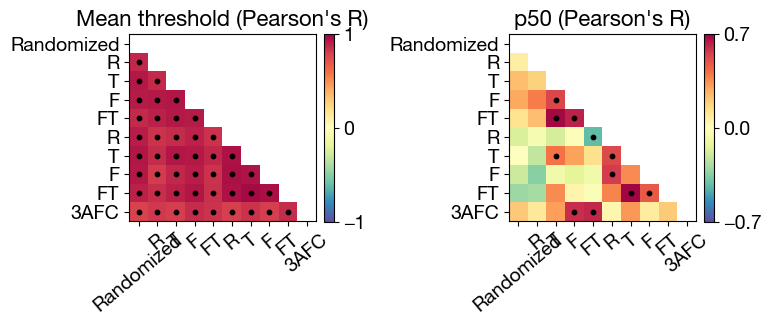

In [6]:
fig = Fig4p50.plot_correlation_matrices(Fig4p50, threshold_corr, threshold_pval, p50_corr, p50_pval)
plt.savefig(op.join(fig_dir, "Fig4B-correlation_matrix.svg"))

#### Thresholds significant results

In [7]:
print_sig_corr(threshold_corr, threshold_pval)

         Condition_1           Condition_2  PearsonR  p-value sig
0    (Continuous, R)  (Bayesian, Bayesian)     0.868      0.0   *
1    (Continuous, T)  (Bayesian, Bayesian)     0.916      0.0   *
2    (Continuous, T)       (Continuous, R)     0.866      0.0   *
3    (Continuous, F)  (Bayesian, Bayesian)     0.907      0.0   *
4    (Continuous, F)       (Continuous, R)     0.921      0.0   *
5    (Continuous, F)       (Continuous, T)     0.923      0.0   *
6   (Continuous, FT)  (Bayesian, Bayesian)     0.863      0.0   *
7   (Continuous, FT)       (Continuous, R)     0.895      0.0   *
8   (Continuous, FT)       (Continuous, T)     0.915      0.0   *
9   (Continuous, FT)       (Continuous, F)     0.908      0.0   *
10      (Cluster, R)  (Bayesian, Bayesian)     0.904      0.0   *
11      (Cluster, R)       (Continuous, R)     0.831      0.0   *
12      (Cluster, R)       (Continuous, T)     0.857      0.0   *
13      (Cluster, R)       (Continuous, F)     0.885      0.0   *
14      (C

#### p50 significant results

In [8]:
print_sig_corr(p50_corr, p50_pval)

         Condition_1       Condition_2  PearsonR  p-value sig
5    (Continuous, F)   (Continuous, T)     0.534    0.006   *
8   (Continuous, FT)   (Continuous, T)     0.679    0.001   *
9   (Continuous, FT)   (Continuous, F)     0.618    0.002   *
14      (Cluster, R)  (Continuous, FT)    -0.430    0.046   *
17      (Cluster, T)   (Continuous, T)     0.410    0.047   *
20      (Cluster, T)      (Cluster, R)     0.524    0.005   *
26      (Cluster, F)      (Cluster, R)     0.563    0.002   *
34     (Cluster, FT)      (Cluster, T)     0.686    0.000   *
35     (Cluster, FT)      (Cluster, F)     0.475    0.016   *
39      (3AFC, 3AFC)   (Continuous, F)     0.595    0.001   *
40      (3AFC, 3AFC)  (Continuous, FT)     0.608    0.003   *


### Difference with random condition

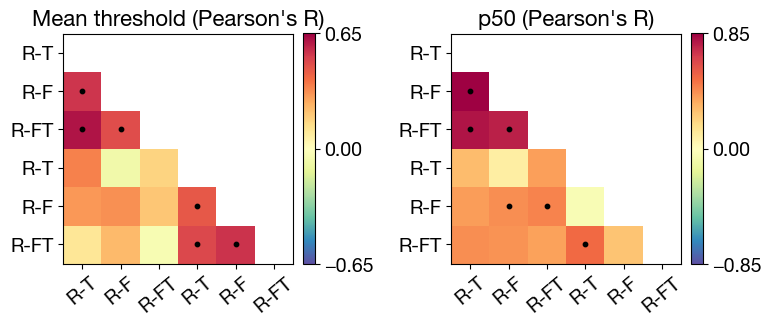

In [9]:
threshold_diff_matrix = difference_with_random(threshold_matrix)
threshold_diff_corr, threshold_diff_pval = compute_correlation_matrix(threshold_diff_matrix)

p50_diff_matrix = difference_with_random(p50_matrix)
p50_diff_corr, p50_diff_pval = compute_correlation_matrix(p50_diff_matrix)


fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121)
Fig4p50.plot_correlation_subplot(fig, ax1, threshold_diff_corr, threshold_diff_pval, 'mean_threshold')

ax2 = fig.add_subplot(122)
Fig4p50.plot_correlation_subplot(fig, ax2, p50_diff_corr, p50_diff_pval, 'distance_p50')

plt.tight_layout()

#### Threshold diff significant results

In [10]:
print_sig_corr(threshold_diff_corr, threshold_diff_pval)

           Condition_1        Condition_2  PearsonR  p-value sig
0    (Continuous, R-F)  (Continuous, R-T)     0.538    0.003   *
1   (Continuous, R-FT)  (Continuous, R-T)     0.607    0.001   *
2   (Continuous, R-FT)  (Continuous, R-F)     0.475    0.011   *
9       (Cluster, R-F)     (Cluster, R-T)     0.442    0.018   *
13     (Cluster, R-FT)     (Cluster, R-T)     0.488    0.008   *
14     (Cluster, R-FT)     (Cluster, R-F)     0.541    0.003   *


#### p50 diff significant results

In [11]:
print_sig_corr(p50_diff_corr, p50_diff_pval)

           Condition_1         Condition_2  PearsonR  p-value sig
0    (Continuous, R-F)   (Continuous, R-T)     0.850    0.000   *
1   (Continuous, R-FT)   (Continuous, R-T)     0.795    0.000   *
2   (Continuous, R-FT)   (Continuous, R-F)     0.763    0.000   *
7       (Cluster, R-F)   (Continuous, R-F)     0.420    0.036   *
8       (Cluster, R-F)  (Continuous, R-FT)     0.445    0.038   *
13     (Cluster, R-FT)      (Cluster, R-T)     0.521    0.011   *
